In [1]:
## In this cell we import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## This cell is used to define the problem
## The comment on the right side of each variable denotes the physical units

# Spring constant
k_spring = 1.5   #  N m-1  

# Mass
m        = 0.4   #  kg

# Angular frequency
omega    = np.sqrt(k_spring / m)   # s-1

# Initial position
x0       = 1   # m

# Initial momentum
p0       = 0   # kg m s-1


# Initial and arrival time
tmin     = 0    # s    
tmax     = 10   # s   

# Number of timestpes
Nt       = 100

# Array with time values
t        = np.linspace(tmin, tmax, Nt)   # s

# Integrator timestep
dt       = t[1] - t[0]   # s

In [3]:
## In this cell we write the exact solution

# Position solution
x        =  x0 * np.cos( omega * t ) + p0 / m / omega * np.sin( omega * t )

# Momentum solution
p        = - m * omega * x0 * np.sin( omega * t ) + p0 * np.cos( omega * t )

In [4]:
## In this cell we implement the Euler integrator

# First, we create two vectors of zeros for the position and the momentum with the number of timesteps Nt
x_euler    = np.zeros(Nt)
p_euler    = np.zeros(Nt)

# We replace the first entry of the two vectors with the initial and the 
x_euler[0] = x0

for k in range(Nt-1):
    F       =  - k_spring * x_euler[k]
    x_euler[k+1]  =  x_euler[k]  +  p_euler[k] * dt / m + F / m * dt ** 2 
    p_euler[k+1]  =  p_euler[k]  +  F * dt 

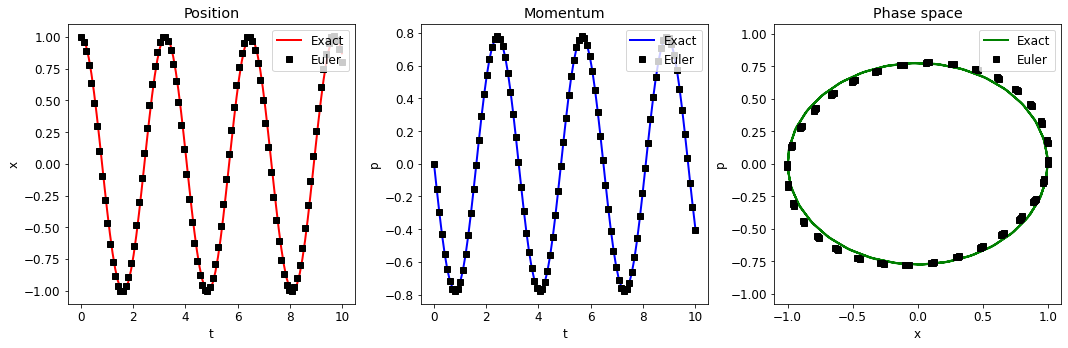

In [8]:
# These two commands are used to define the font size
font = {'size'   : 12}
plt.rc('font', **font)


# This command is used to create three graphs in a row in the same figure
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15,5)) 


# The option "label = " is used to create a legend 
# Plot the position
ax1.plot( t, x,       'r',   linewidth = 2,  label = "Exact")
ax1.plot( t, x_euler, 'ks',  linewidth = 2,  label = "Euler")

ax1.set_title('Position')
ax1.set_xlabel('t')
ax1.set_ylabel('x')

#This command create a legend 
ax1.legend(loc="upper right")

# Plot the momentum
ax2.plot( t, p,       'b',   linewidth = 2,  label = "Exact")
ax2.plot( t, p_euler, 'ks',  linewidth = 2,  label = "Euler")

ax2.set_title('Momentum')
ax2.set_xlabel('t')
ax2.set_ylabel('p')
ax2.legend(loc="upper right")

# Plot the solution in the phase space
ax3.plot( x,       p,       'g',  linewidth = 2,  label = "Exact")
ax3.plot( x_euler, p_euler, 'ks', linewidth = 2,  label = "Euler")

ax3.set_title('Phase space')
ax3.set_xlabel('x')
ax3.set_ylabel('p')
ax3.axis("equal")
ax3.legend(loc="upper right")


# This command is used to fix the margins
fig.tight_layout()